# Sentiment Analysis using Machine Learning

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
sns.set(rc={'figure.figsize':(16,8)})
pd.set_option('display.max_columns',200)
import datetime
import ast
plt.style.use('fivethirtyeight')
cp = sns.color_palette()


In [2]:
#loading and reading the reviews dataset
df=pd.read_csv('Movie_reviews.csv',encoding = "ISO-8859-1")

In [3]:
# examine sample reviews 
df.sample(10)

,Review,Sentiment
1052,"I loved the latest "" Mission Impossible "" and ...",1
5029,"MI3 mission impossible III sucked ass, like th...",0
4801,i heard da vinci code sucked soo much only 2.5...,0
3070,"As much as I love Brokeback Mountain, it is su...",1
782,The Da Vinci Code was absolutely AWESOME!,1
1986,mission impossible 2 rocks!!....,1
1954,the last stand and Mission Impossible 3 both w...,1
4057,"X3-good, Nacho Libre-sucked, Da Vinci Code-suc...",0
2821,I love Harry Potter.,1
4627,Da Vinci Code sucked..,0


## Class Indicators

### Positive - 1
### Negative - 0

In [4]:
#number of reviews 
df.shape

(7087, 2)

In [5]:
#import and instantiate Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()

In [6]:
# Examine Class frequency Ditribution 
df.Sentiment.value_counts()

1    3995
0    3092
Name: Sentiment, dtype: int64

In [7]:
#Defining X and y variables
X=df.Review
y=df.Sentiment
print (X.shape)
print (y.shape)

(7087,)
(7087,)


In [8]:
#Splitting X, y into training and test  datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

# Vectorising the data

In [9]:
#Learning the vocab of entire data
vect.fit(X)
#transforming the vocab into Document term matrix
X_train_dtm=vect.transform(X_train)

In [10]:
#View tokens and document term matrix
pd.DataFrame(X_train_dtm.toarray(),columns=vect.get_feature_names())[:10]

,00,007,10,10pm,16,1984,1st,200,2007,2nd,30,33,3333,385,517,6th,70,7th,9am,aaron,ab,abortion,abou,about,abrams,abso,absolute,absolutely,academy,account,acne,acoustic,acting,actio,action,actor,actually,add,admiring,adorable,adore,adversity,af,afraid,after,afterschool,aga,again,ago,agree,agreed,ah,aimee,aka,al,all,alm,almost,along,already,alright,also,although,always,am,amazes,amazing,amazingly,america,amã,an,anatomy,anax,and,ang,angel,angels,animated,anime,aniwae,anne,answers,anus,any,anyhow,anyone,anything,anyway,anyways,ap,apart,apolo,apparently,appeal,archive,are,arguments,around,arse,artemis,...,wa,waaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,wacked,wait,wal,walks,wanna,want,wanted,wants,warns,was,wasn,watch,watched,watching,watson,way,we,weeeellllllll,week,weekend,weiners,weird,wel,well,went,were,wesley,wh,what,whatev,whatever,when,whenever,where,whereas,whether,whi,which,while,whiny,who,whole,whom,whos,why,wiccanism,wiccans,wicked,wif,will,win,wish,with,witha,without,won,wondered,wonderful,wondering,woo,word,work,working,world,worse,worst,wort,worth,worthless,wotshisface,would,wow,write,writer,writers,writes,written,wrong,wrote,wussies,x3,xd,ya,yahoo,yea,yeah,year,yes,yesterday,yet,yip,you,younger,your,yuck,yuh,zen,âµâª
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [11]:
#Examine the Document Term Matrix
X_train_dtm
X_train_dtm.shape

(5315, 1758)

In [12]:
#Transforming and creating DTM of test data
X_test_dtm=vect.transform(X_test)
X_test_dtm.shape

(1772, 1758)

In [13]:
#View tokens and document term matrix for test data
pd.DataFrame(X_test_dtm.toarray(),columns=vect.get_feature_names())[:10]

,00,007,10,10pm,16,1984,1st,200,2007,2nd,30,33,3333,385,517,6th,70,7th,9am,aaron,ab,abortion,abou,about,abrams,abso,absolute,absolutely,academy,account,acne,acoustic,acting,actio,action,actor,actually,add,admiring,adorable,adore,adversity,af,afraid,after,afterschool,aga,again,ago,agree,agreed,ah,aimee,aka,al,all,alm,almost,along,already,alright,also,although,always,am,amazes,amazing,amazingly,america,amã,an,anatomy,anax,and,ang,angel,angels,animated,anime,aniwae,anne,answers,anus,any,anyhow,anyone,anything,anyway,anyways,ap,apart,apolo,apparently,appeal,archive,are,arguments,around,arse,artemis,...,wa,waaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,wacked,wait,wal,walks,wanna,want,wanted,wants,warns,was,wasn,watch,watched,watching,watson,way,we,weeeellllllll,week,weekend,weiners,weird,wel,well,went,were,wesley,wh,what,whatev,whatever,when,whenever,where,whereas,whether,whi,which,while,whiny,who,whole,whom,whos,why,wiccanism,wiccans,wicked,wif,will,win,wish,with,witha,without,won,wondered,wonderful,wondering,woo,word,work,working,world,worse,worst,wort,worth,worthless,wotshisface,would,wow,write,writer,writers,writes,written,wrong,wrote,wussies,x3,xd,ya,yahoo,yea,yeah,year,yes,yesterday,yet,yip,you,younger,your,yuck,yuh,zen,âµâª
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Classification of Sentiment using Machine Learning

In [14]:
#Importing and instantiating the NB classifier
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [15]:
#training the model using train data DTM
%time nb.fit(X_train_dtm,y_train)

CPU times: user 2.62 ms, sys: 1.68 ms, total: 4.31 ms
Wall time: 5.1 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
#making predictions on test data
y_pred_class=nb.predict(X_test_dtm)

In [17]:
#Examine accuracy of predictions 
from sklearn.metrics import confusion_matrix,classification_report
print (confusion_matrix(y_test,y_pred_class))
print (classification_report(y_test,y_pred_class))

[[758  23]
 [ 16 975]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       781
           1       0.98      0.98      0.98       991

    accuracy                           0.98      1772
   macro avg       0.98      0.98      0.98      1772
weighted avg       0.98      0.98      0.98      1772



## True Positives - 975
## True Negatives - 758
## False Positives - 23
## False Negatives - 16


In [18]:
#Examine the false negatives
X_test[(y_pred_class==0) & (y_test==1)]

1102    We had the Brazil meeting and then we went to ...
2188    I love Harry Potter, but right now I hate it (...
2043    for that ( but since it was my fault she is in...
3121    i love when brokeback mountain won at the crit...
1145    Friday I went out with Chris and we watched Mi...
2146    Harry Potter and the Veil of Darkness by Ocean...
1002    ok it's time to update wow haven't updated for...
2130    It can be seen all over the television and mov...
94      im sick of books right now, but i must say, da...
2090    Harry Potter and the Sorcerer's Stone is great...
2168    I keep gettting into little I want my Harry Po...
3005    no, I hope this doesn't end up like Brokeback ...
181     Then we went to the movies and saw The Da Vinc...
3194    Brokeback Mountain is packed with beautiful sc...
2064               The Harry Potter scar would be cool...
1173    After some frenzied phone calls, Laura, Chris,...
Name: Review, dtype: object

In [19]:
#Examine the tokens 
X_train_tokens=vect.get_feature_names()

In [20]:
len(X_train_tokens)

1758

In [21]:
#Examine first 50 tokens
print (X_train_tokens[:50])

['00', '007', '10', '10pm', '16', '1984', '1st', '200', '2007', '2nd', '30', '33', '3333', '385', '517', '6th', '70', '7th', '9am', 'aaron', 'ab', 'abortion', 'abou', 'about', 'abrams', 'abso', 'absolute', 'absolutely', 'academy', 'account', 'acne', 'acoustic', 'acting', 'actio', 'action', 'actor', 'actually', 'add', 'admiring', 'adorable', 'adore', 'adversity', 'af', 'afraid', 'after', 'afterschool', 'aga', 'again', 'ago', 'agree']


In [22]:
#Examine last 50 tokens
print (X_train_tokens[-50:])

['wif', 'will', 'win', 'wish', 'with', 'witha', 'without', 'won', 'wondered', 'wonderful', 'wondering', 'woo', 'word', 'work', 'working', 'world', 'worse', 'worst', 'wort', 'worth', 'worthless', 'wotshisface', 'would', 'wow', 'write', 'writer', 'writers', 'writes', 'written', 'wrong', 'wrote', 'wussies', 'x3', 'xd', 'ya', 'yahoo', 'yea', 'yeah', 'year', 'yes', 'yesterday', 'yet', 'yip', 'you', 'younger', 'your', 'yuck', 'yuh', 'zen', 'âµâª']


In [23]:
#Number of times each token appears in each class
nb.feature_count_

array([[ 1.,  1.,  3., ...,  0., 60.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [24]:
#Negative reviews
neg_review_token_count=nb.feature_count_[0,:]
neg_review_token_count

array([ 1.,  1.,  3., ...,  0., 60.,  0.])

In [25]:
#positive reviews 
pos_review_token_count=nb.feature_count_[1,:]
pos_review_token_count

array([0., 0., 1., ..., 0., 0., 0.])

In [26]:
#Create new df containing both class tokens
token_df=pd.DataFrame({'token':X_train_tokens,'neg':neg_review_token_count,'pos':pos_review_token_count})

In [27]:
#Examine the shape of dataframe
token_df.shape

(1758, 3)

In [28]:
#Examine the dataframe
token_df.sample(10)

,token,neg,pos
1522,tha,48.0,0.0
353,cuz,0.0,0.0
1234,radcli,0.0,0.0
691,halfway,1.0,0.0
1694,whereas,0.0,1.0
1387,simply,0.0,1.0
7,200,0.0,0.0
753,holy,0.0,1.0
583,food,0.0,2.0
1132,overlooking,1.0,0.0


In [29]:
#Selecting top 100 appeared negative class tokens
top_neg_words=token_df.sort_values(by='neg', ascending=[False])[:100]

In [30]:
#Creating a single string with all tokens
word_string = ' '.join(top_neg_words['token'])

In [31]:
!pip install wordcloud

     |████████████████████████████████| 163kB 1.2MB/s eta 0:00:01


In [32]:
#Importing libraries for word cloud
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS


In [33]:
#Removing stopwords
stopwords = set(STOPWORDS)
stopwords.add("vinci")
stopwords.add("movie")


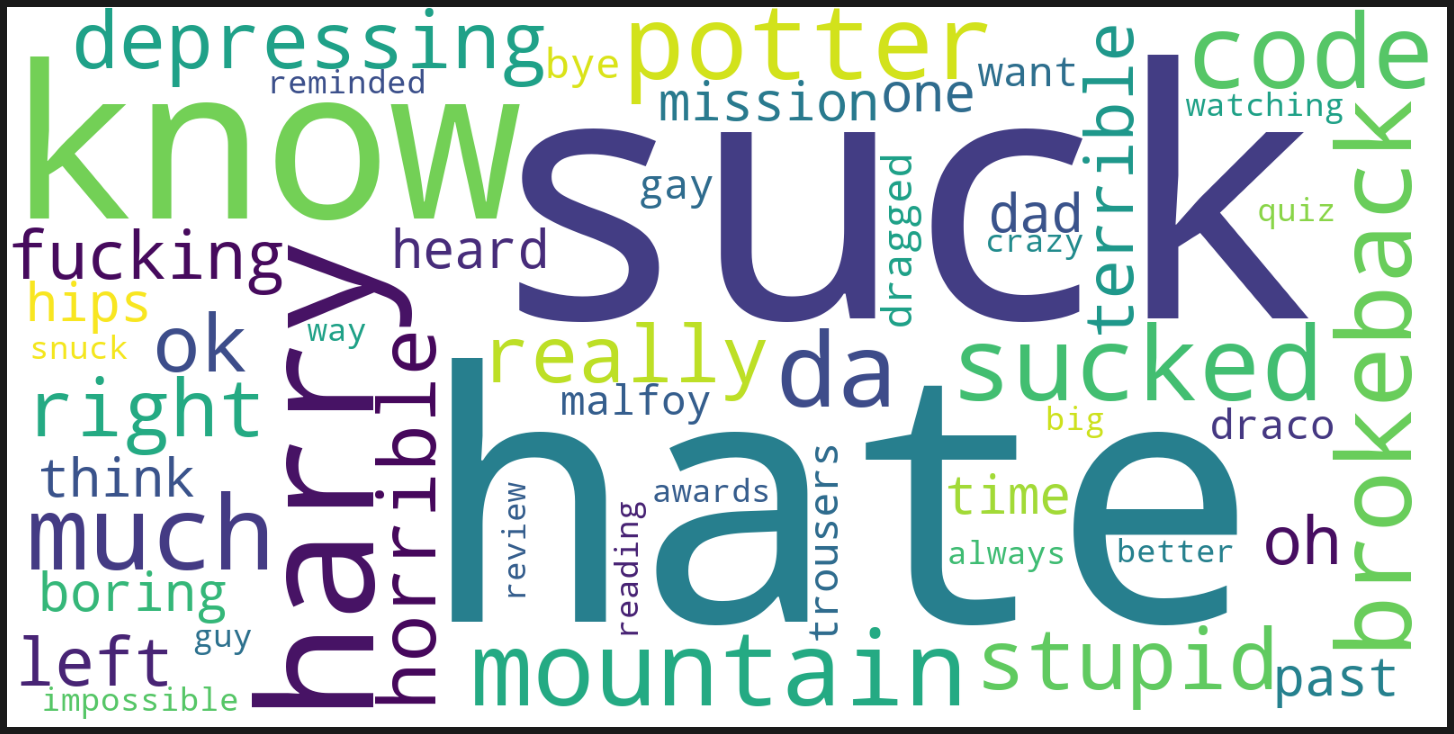

In [34]:
#Creating the word cloud
wordcloud = WordCloud(stopwords=stopwords,background_color='white',width=1600, height=800).generate(word_string)
# Open a plot of the generated image.
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [35]:
#Selecting top 100 appeared positive class tokens
top_pos_words=token_df.sort_values(by='pos', ascending=[False])[:100]

In [36]:
#creating a single string with all tokens
pos_word_string=' '.join(top_pos_words['token'])


In [37]:
#Custom stopwords
pos_stopwords=set(STOPWORDS)
pos_stopwords.add("vinci")
pos_stopwords.add("movie")

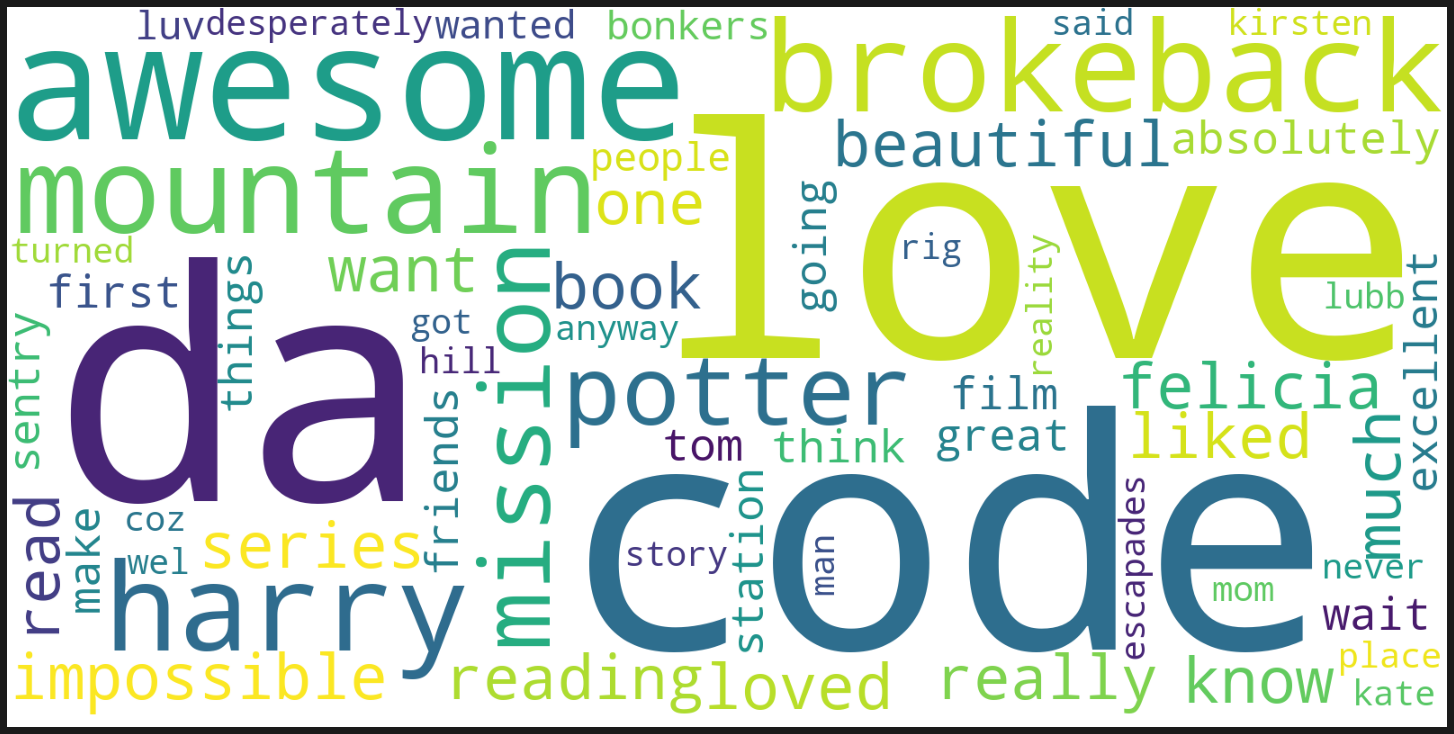

In [38]:
#Creating the word cloud
wordcloud = WordCloud(stopwords=stopwords,background_color='white',width=1600, height=800).generate(pos_word_string)
# Open a plot of the generated image.
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Thank You :) 